In [164]:
import numpy as np
import pandas as pd
import plotly.express as px

In [165]:
df = pd.read_csv('Crypto Startup Founders Responses.csv')

In [166]:
df.shape

(73, 32)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Educación                                                                                73 non-null     object 
 1   ¿Cuándo comenzó tu proyecto?                                                             73 non-null     object 
 2   ¿Por qué decidiste emprender?                                                            73 non-null     object 
 3   ¿Qué desafíos tuviste a la hora de empezar/decidir a emprender?                          73 non-null     object 
 4   ¿Accediste a financiamiento? famila, amigos, angel investors, venture capital...         73 non-null     object 
 5   ¿Cuál fue la fuente de ese financiamiento?                        

In [168]:
df.columns

Index(['Educación', '¿Cuándo comenzó tu proyecto?',
       '¿Por qué decidiste emprender?',
       '¿Qué desafíos tuviste a la hora de empezar/decidir a emprender?',
       '¿Accediste a financiamiento? famila, amigos, angel investors, venture capital...',
       '¿Cuál fue la fuente de ese financiamiento?', 'Etapa del proyecto',
       '¿Con cuantos potenciales inversores contactaste? ',
       'Si participaste de una incubadora/aceleradora. ¿Cómo impactó ese proceso en tu negocio?',
       '¿Por qué no accediste a fondos?',
       '¿Qué desafíos tenés cómo founder hoy en día?',
       '¿Algún desafío único para crear productos para el mercado Argentino?',
       '¿Dónde necesitas más apoyo?',
       '¿Qué políticas o regulaciones te perjudican?',
       '¿Qué políticas o regulaciones te benefician?', 'Tipo de empresa',
       'Cantidad de gente en el equipo',
       '¿Qué porcentaje de ese equipo está en Argentina?',
       'Burn-rate mensual de tu empresa (opcional)',
       'Revenu

In [169]:
column_names = {
    'Educación' : 'founder_education',
    '¿Cuándo comenzó tu proyecto?' : 'project_start',
    '¿Por qué decidiste emprender?' : 'project_reason',
    '¿Qué desafíos tuviste a la hora de empezar/decidir a emprender?': 'challenges_early',
    '¿Accediste a financiamiento? famila, amigos, angel investors, venture capital...' : 'financing',
    '¿Cuál fue la fuente de ese financiamiento?' : 'financing_source', 
    'Etapa del proyecto' : 'project_stage',
    '¿Con cuantos potenciales inversores contactaste? ' : 'investors_contacted',
    'Si participaste de una incubadora/aceleradora. ¿Cómo impactó ese proceso en tu negocio?' : 'accelerator_impact',
    '¿Por qué no accediste a fondos?' : 'financing_non_reason',
    '¿Qué desafíos tenés cómo founder hoy en día?' : 'challenges_current',
    '¿Algún desafío único para crear productos para el mercado Argentino?' : 'challenges_argentina',
    '¿Dónde necesitas más apoyo?' : 'challenges_support',
    '¿Qué políticas o regulaciones te perjudican?' : 'regulation_disadvantage',
    '¿Qué políticas o regulaciones te benefician?' : 'regulation_advantage',
    'Tipo de empresa' : 'project_type',
    'Cantidad de gente en el equipo' : 'team_quantity',
    '¿Qué porcentaje de ese equipo está en Argentina?' : 'team_split',
    'Lugar trabajo' : 'project_workplace',
    'Estructura legal' : 'legal_structure', 
    # '@' : '', 
    # 'Repetido' : '', 
    # 'Not crypto' : '',
    # 'included in Landscape' : '', 
    'Industria/vertical' : 'industry', 
    'Edad': 'founder_age',
    'Lugar de nacimiento - Provincia' : 'birth_province', 
    'Lugar de nacimiento - Pais' : 'birth_country',
    'Lugar de residencia - Provincia': 'living_province', 
    'Lugar de residencia - Pais' : 'living_country',
}

In [170]:
# rename columns to english and simplify
df.rename(columns=column_names, inplace=True)

In [171]:
df['founder_age'] = pd.to_numeric(df['founder_age'])

In [ ]:
# clean date
df['project_start'] = np.where(df['project_start']=='4/1/0021', '4/1/2021',df['project_start'])

In [215]:
# enforce date datatype
df['project_start'] = pd.to_datetime(df['project_start'])

In [218]:
# ignore date of birth
df = df[ df['project_start'] > '01/01/2010']

# Analysis

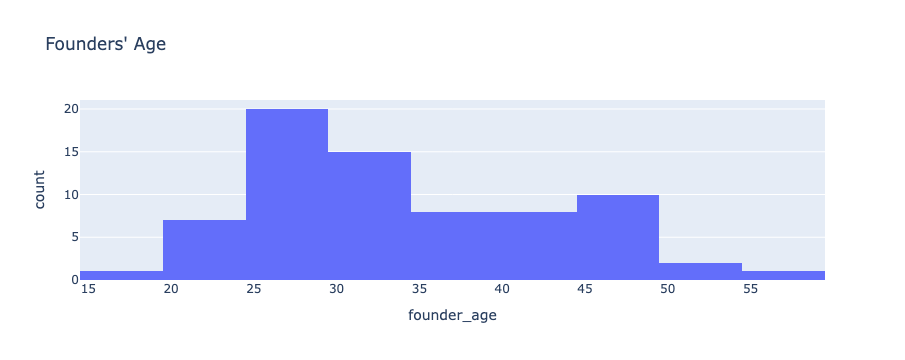

In [172]:
fig = px.histogram(df, x='founder_age', title="Founders' Age")
fig.show()

In [188]:
df_arg = df[['birth_province','birth_country','living_province','living_country']]

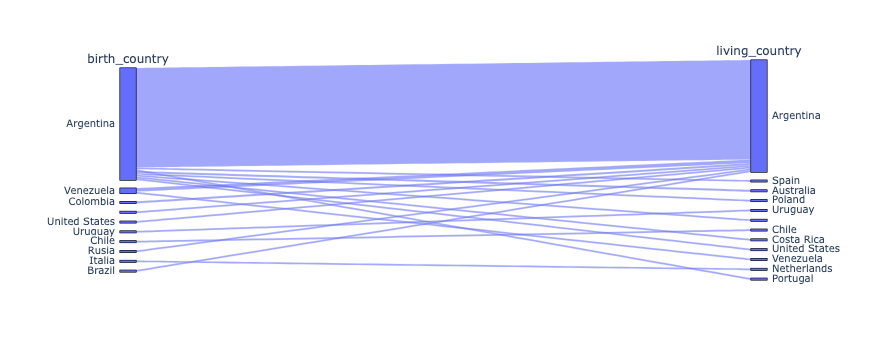

In [192]:
fig = px.parallel_categories(df_arg[['birth_country','living_country']], color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

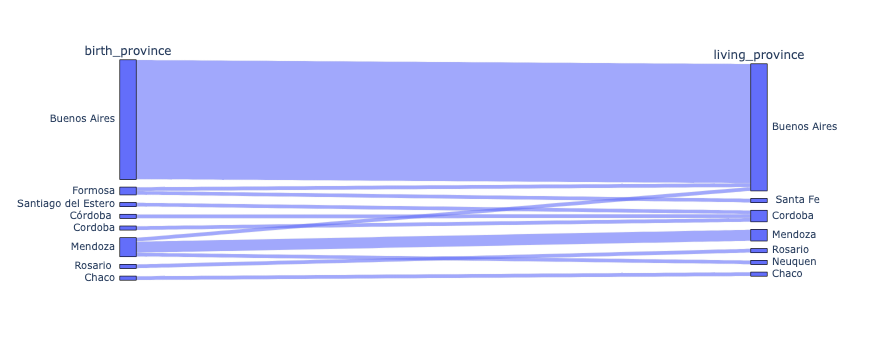

In [195]:
fig = px.parallel_categories(df_arg[['birth_province','living_province']].dropna(axis=0), color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [196]:
ba_ba = df_arg[ (df_arg['birth_province'] == 'Buenos Aires') & (df_arg['living_province'] == 'Buenos Aires') ]['birth_province'].count()
to_ba = df_arg[ (df_arg['birth_province'] != 'Buenos Aires') & (df_arg['living_province'] == 'Buenos Aires') ]['birth_province'].count()

In [197]:
print('moved to Buenos Aires:',to_ba)

moved to Buenos Aires: 2


In [198]:
arg = df_arg[ df_arg['birth_country'] == 'Argentina']['birth_country'].count()
non_arg = df_arg[ df_arg['birth_country'] != 'Argentina']['birth_country'].count()

In [199]:
print('Argentinean founders:',arg)
print('Non-Argentinean founders:',non_arg)

Argentinean founders: 62
Non-Argentinean founders: 10


In [ ]:
fig = px.line(df, 
              x="project_start", 
              y="lifeExp", 
              color="continent", 
              line_group="country", 
              hover_name="country",
              line_shape="spline", 
              render_mode="svg")
fig.show()

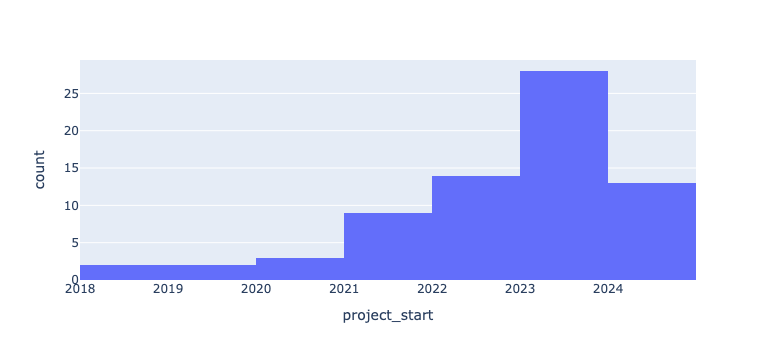

In [219]:
fig = px.histogram(df, x='project_start', title="")
fig.show()

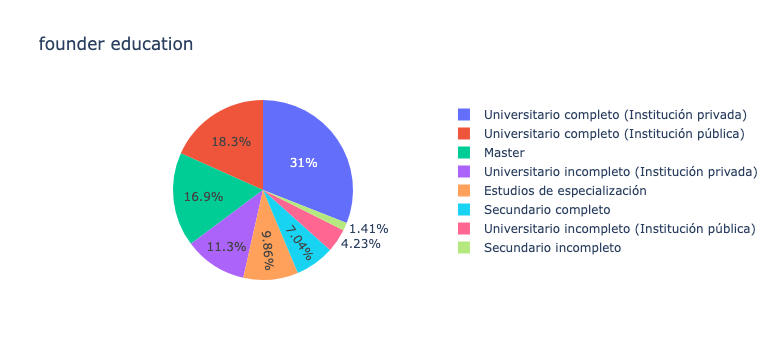

In [222]:
fig = px.pie(df, names='founder_education', title='founder education')
fig.show()

In [256]:
# group non standard responses for reasoning for founding
threshold = 10
response_counts = df['project_reason'].value_counts()
responses_below_threshold = response_counts[response_counts < threshold].index
df['project_reason_grouped'] = df['project_reason'].apply(lambda x: x if x not in responses_below_threshold else 'Others')

0                      Others
1     Quería cambiar el mundo
2                     Desafio
3                     Desafio
4                     Desafio
               ...           
68                Oportunidad
69                    Desafio
70    Quería cambiar el mundo
71                Oportunidad
72                    Desafio
Name: project_reason_grouped, Length: 71, dtype: object

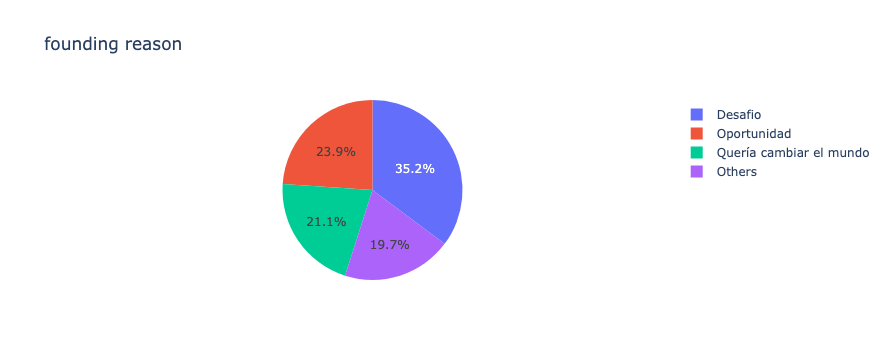

In [258]:
fig = px.pie(df, names='project_reason_grouped', title='founding reason')
fig.show()

In [ ]:
# word cloud

In [ ]:
# frequency

fig = px.bar(df, x="total_bill", y="day", orientation='h')
fig.show()



In [ ]:
df[['A', 'B']] = df['AB'].str.split(' ', n=1, expand=True)

In [265]:
df_challenges = df['challenges_early'].str.split(',', expand=True)

In [307]:
challenges_early = df_challenges.to_list()
challenges_early

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [308]:
flat_list = []

In [309]:
for column in challenges_early:
    colum.to_list()
    flat_list.append(colum)

NameError: name 'colum' is not defined

In [310]:
flat_list

[]

In [281]:
for line in challenges_early:
    flat_list.append(line)

In [293]:
flat_list = []

for line in challenges_early:
    for items in line:
        flat_list.append(line)

In [294]:
flat_list

['Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de clientes',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamiento',
 'Falta de socios, Falta de financiamient

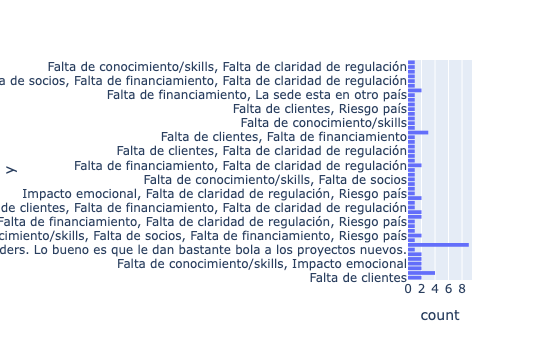

In [283]:
fig = px.histogram(df, y=flat_list, title="")
fig.show()

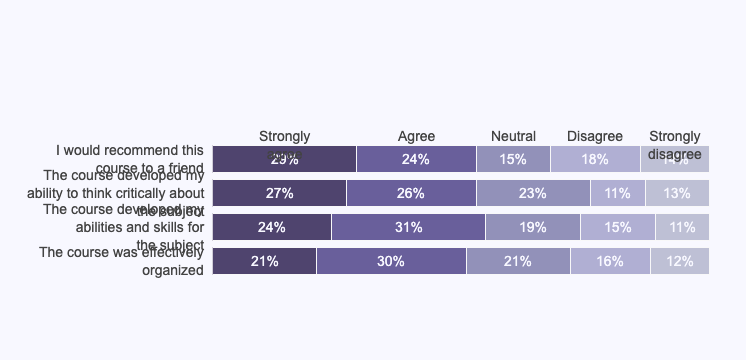

In [259]:
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()